<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_8_Vector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8 - Vector Analysis

This notebook contains the code for the example problems found in Chapter 8.

Example 8.1: Plotting a scalar field

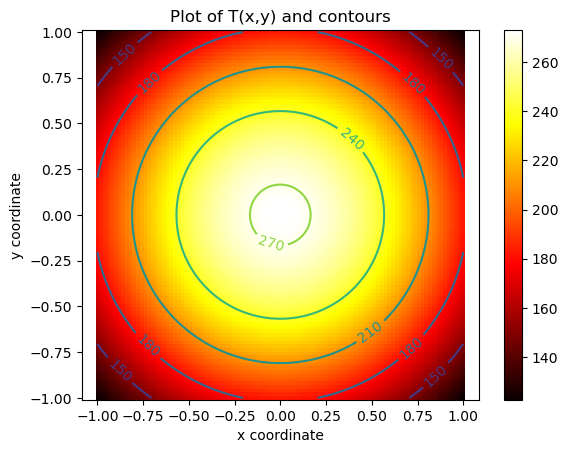

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

coord_range = np.linspace(-1,1,100)

x, y = np.meshgrid(coord_range,coord_range)

T0 , sigma = 273.0, 0.4
T = T0 * np.exp(-sigma * (x**2 + y**2))

# use contour() to plot the contours and
# use clabel() to label the contours

plt.pcolormesh(x,y,T, cmap = cm.hot)
plt.colorbar();

plt.clabel(plt.contour(x,y,T,5));

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.axis('equal')
plt.title('Plot of T(x,y) and contours')
plt.show()

Example 8.2: Plotting a vector field

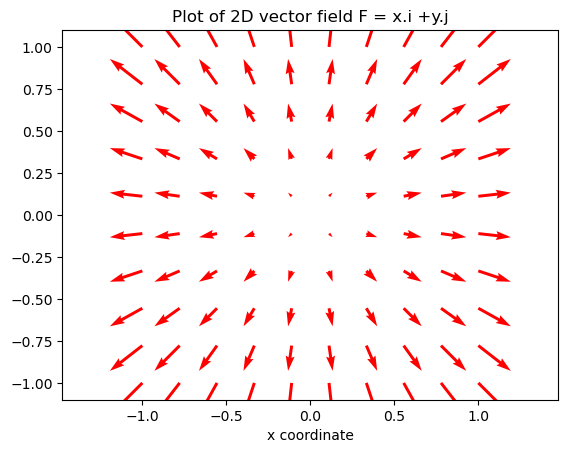

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coord_range = np.linspace(-1,1,10)

x, y = np.meshgrid(coord_range,coord_range)

vx =  x
vy =  y

# plot arrows at the points (x,y) with length (vx, vy)
plt.quiver(x,y,vx,vy, color = 'r')

plt.xlabel('x coordinate')

plt.axis('equal')
plt.title('Plot of 2D vector field F = x.i +y.j')
plt.show()

Example 8.3: Gravitational potential energy

---------------------------- CODE OUTPUT ----------------------------- 

x-component of gradient= -R.x*G*Me*m/(R.x**2 + R.y**2 + R.z**2)**(3/2)
y-component of gradient= -R.y*G*Me*m/(R.x**2 + R.y**2 + R.z**2)**(3/2)
z-component of gradient= -R.z*G*Me*m/(R.x**2 + R.y**2 + R.z**2)**(3/2)


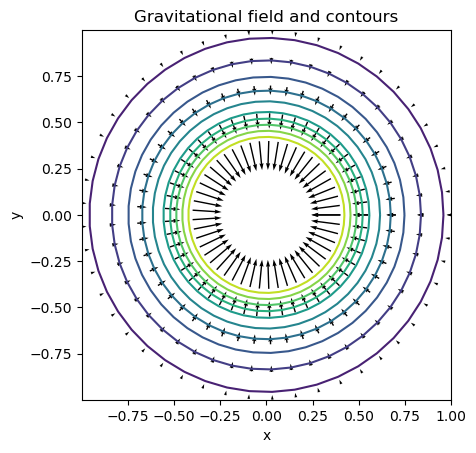

In [ ]:
from sympy.vector import CoordSys3D, gradient, Del
from sympy import symbols, sqrt
import numpy as np
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

R = CoordSys3D('R')
delop = Del()

G, m, Me = symbols('G, m, Me')

V = -G*m*Me/sqrt(R.x**2 + R.y**2 + R.z**2)
F =-delop(V).doit() # evaluate all 3 components of gradient vector F

# use .coef method to get components Fx, Fy, Fz
print('x-component of gradient=',F.coeff(R.i))
print('y-component of gradient=',F.coeff(R.j))
print('z-component of gradient=',F.coeff(R.k))

# Create grid for radius r and polar angle theta
# r=0.4 to r=1, and theta=0,2*pi
r, theta = np.mgrid[0.4:1:5j, 0.0:2*np.pi:50j]

# calculate values of x,y where arrows will be drawn
x = r*np.cos(theta)
y = r*np.sin(theta)

# Gravitational potential V with m=M=G=1
V = 1/(x**2 + y**2)**(1/2)

# creating plot of Force and contours where V=constant
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Components of Force along x and y axis
Fx = -x/(x**2 + y**2)**(3/2)
Fy = -y/(x**2 + y**2)**(3/2)

plt.quiver(x,y,Fx,Fy)
plt.contour(x,y,V,10);

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gravitational field and contours')
plt.show()

Example 8.4: The directional derivative

In [ ]:
from sympy import simplify
from sympy.vector import CoordSys3D, directional_derivative, gradient

print('-'*28,'CODE OUTPUT','-'*29,'\n')
C = CoordSys3D('C')       # Cartesian system named C
                          # has unit vectors C.i , C.j , C.k

f = C.x * C.y * C.z       # scalar field f(x, y, z)=xyz

v = C.i + C.j + C.k       # vector v defines desired direction

n = v.normalize()         # n= normalized vector v
print('Normalized vector n =',n)

# directional deriv=dot product of n and gradient(f)
print('\nDirectional derivative using gradient(f) is:')
print(simplify(n.dot(gradient(f))))

# Shortcut method for directional deriv,
# using the dedicated function directional_derivative
print('\nThe alternative method using directional_derivativ gives:')
print(simplify(directional_derivative( C.x*C.y*C.z, n)))

---------------------------- CODE OUTPUT ----------------------------- 

Normalized vector n = (sqrt(3)/3)*C.i + (sqrt(3)/3)*C.j + (sqrt(3)/3)*C.k

Directional derivative using gradient(f) is:
sqrt(3)*(C.x*C.y + C.x*C.z + C.y*C.z)/3

The alternative method using directional_derivativ gives:
sqrt(3)*(C.x*C.y + C.x*C.z + C.y*C.z)/3


Example 8.5: The gradient in cylindrical coordinates

In [ ]:
from sympy import sin, cos, flatten
from sympy.vector import CoordSys3D, gradient, curl, divergence

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define Cartesian system named c, with unit vectors c.i, c.j, c.k
# Transform it to system with cylindrical coordinates (rho, phi, z)

c = CoordSys3D('c', transformation='cylindrical',\
variable_names = list("rpz"),vector_names=list("RPZ") )

# variables are c.r, c.t, c.z
scalar = c.r*sin(c.p)*cos(c.z)

print('scalar =',scalar)

gr = gradient(scalar)
print('\nThe gradient of this scalar in cylindrical is:')
print(gr)

print('\nThe r-component of the gradient is:', gr.coeff(c.R))
print('The theta-component of the gradient is:', gr.coeff(c.P))
print('The z-component of the gradient is:', gr.coeff(c.Z))

N = CoordSys3D('N', transformation='spherical',\
variable_names=list("rtp"),vector_names=list("RTP") )

# variables are c.r, c.theta, c.zphi
scalar = N.r*sin(N.t)*cos(N.p)
print('\n-------Gradient in spherical coordinates-------')
print('scalar =',scalar)

gr=gradient(scalar)
print('\nThe gradient of this scalar in spherical is:')
print(gr)

print('\nThe r-component of the gradient is:', gr.coeff(N.R))
print('The theta-component of the gradient is:', gr.coeff(N.T))
print('The phi-component of the gradient is:', gr.coeff(N.P))

---------------------------- CODE OUTPUT ----------------------------- 

scalar = c.r*sin(c.p)*cos(c.z)

The gradient of this scalar in cylindrical is:
(sin(c.p)*cos(c.z))*c.R + (cos(c.p)*cos(c.z))*c.P + (-c.r*sin(c.p)*sin(c.z))*c.Z

The r-component of the gradient is: sin(c.p)*cos(c.z)
The theta-component of the gradient is: cos(c.p)*cos(c.z)
The z-component of the gradient is: -c.r*sin(c.p)*sin(c.z)

-------Gradient in spherical coordinates-------
scalar = N.r*sin(N.t)*cos(N.p)

The gradient of this scalar in spherical is:
(sin(N.t)*cos(N.p))*N.R + (cos(N.p)*cos(N.t))*N.T + (-sin(N.p))*N.P

The r-component of the gradient is: sin(N.t)*cos(N.p)
The theta-component of the gradient is: cos(N.p)*cos(N.t)
The phi-component of the gradient is: -sin(N.p)


Example 8.6: The derivative rule for gradients

In [ ]:
from sympy.vector import CoordSys3D, gradient

print('-'*28,'CODE OUTPUT','-'*29,'\n')

C = CoordSys3D('C')     # define Cartesian system, named here C

# The scalar field f(x,y,z) is a function of the Cartesian
# coordinate variables C.x, C.y, C.z

from sympy import symbols, Function
f, g = symbols('f, g', cls=Function)

# Define the scalar fields as fscalar(x,y,z), gscalar(x,y,z),
fscalar = f(C.x, C.y, C.z)
gscalar = g(C.x, C.y, C.z)

# Construct the expression for the LHS: grad(f.g)
lhs=gradient(fscalar*gscalar)

# Construct the expression for the rhs: grad(f).g+grad(g).f
rhs=gradient(fscalar)*gscalar+gradient(gscalar)*fscalar

# Compare the two sides
print('The equation grad(f.g)=grad(f).g+grad(g).f is ',lhs==rhs)

---------------------------- CODE OUTPUT ----------------------------- 

The equation grad(f.g)=grad(f).g+grad(g).f is  True


Example 8.7: Solenoidal vector fields

In [ ]:
from sympy.vector import CoordSys3D, divergence, is_solenoidal
from sympy import symbols

R = CoordSys3D('R')
E0 = symbols('E0')

E = 3* R.x**2 * R.y**2 * R.z * R.i \
    + 2 * R.x**3 * R.y * R.z * R.j \
    + R.x**3 * R.y**2 * R.k

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The charge density rho = ')
print(E0*divergence(E))

print('\nThe statement E is a solenoidal field is :',is_solenoidal(E))

---------------------------- CODE OUTPUT ----------------------------- 

The charge density rho = 
E0*(2*R.x**3*R.z + 6*R.x*R.y**2*R.z)

The statement E is a solenoidal field is : False


Example 8.8: Evaluation of the curl and divergence in cylindrical coordinates

In [ ]:
from sympy import sin, cos, flatten
from sympy.vector import CoordSys3D, gradient, curl, divergence

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define Cartesian system named c, with unit vectors c.i, c.j, c.k
# Transform it to system with spherical coordinates (r, theta, phi)

c = CoordSys3D('c', transformation='spherical',\
variable_names=list("rtp"),vector_names=list("RTP") )

# variables are c.r, c.t, c.p, for r, theta, phi

v = c.r*sin(c.t)*c.R + cos(c.p)*c.T

curl_v = curl(v)
div_v = divergence(v)

print('\nThe vector v =',v)

print('\nThe curl of vector in spherical is:')
print(curl_v)

print('\nThe r-component of the curl is:', curl_v.coeff(c.R))
print('The theta-component of the curl is:', curl_v.coeff(c.T))
print('The pi-component of the curl is:', curl_v.coeff(c.P))

print('\nThe divergence of vector in spherical is:')
print(div_v)

---------------------------- CODE OUTPUT ----------------------------- 


The vector v = (c.r*sin(c.t))*c.R + (cos(c.p))*c.T

The curl of vector in spherical is:
(sin(c.p)/(c.r*sin(c.t)))*c.R + ((-c.r*cos(c.t) + cos(c.p))/c.r)*c.P

The r-component of the curl is: sin(c.p)/(c.r*sin(c.t))
The theta-component of the curl is: 0
The pi-component of the curl is: (-c.r*cos(c.t) + cos(c.p))/c.r

The divergence of vector in spherical is:
3*sin(c.t) + cos(c.p)*cos(c.t)/(c.r*sin(c.t))


Example 8.9: Evaluation of the curl of a gradient

In [ ]:
# Proof of curl of the gradient of f = 0
from sympy.vector import CoordSys3D, curl, gradient

print('-'*28,'CODE OUTPUT','-'*29,'\n')

C = CoordSys3D('C')     # define Cartesian system, named here C

# The scalar field f(x,y,z) is a function of the Cartesian
# coordinate variables C.x, C.y, C.z

from sympy import symbols, Function
V = symbols('V', cls=Function)

# Define the scalar field as ffield(x,y,z)
ffield = V(C.x, C.y, C.z)

# Construct the expression for the (curl of the gradient)
print('The curl of the gradient is always ',curl(gradient(ffield)))


---------------------------- CODE OUTPUT ----------------------------- 

The curl of the gradient is always  0


Example 8.10: Conservative forces

In [ ]:
from sympy.vector import CoordSys3D, curl, is_conservative
from sympy import symbols

print('-'*28,'CODE OUTPUT','-'*29,'\n')
R = CoordSys3D('R')
c1, c2, c3 = symbols('c1,c2,c3')

F = c1*R.y*R.z*R.i - c2*R.z*R.y*R.j + c3*(R.x+R.y)*R.k

print('The curl(F) is:')
print(curl(F))

print('The statement F is conservative is ',is_conservative(F))

---------------------------- CODE OUTPUT ----------------------------- 

The curl(F) is:
(R.y*c2 + c3)*R.i + (R.y*c1 - c3)*R.j + (-R.z*c1)*R.k
The statement F is conservative is  False


Example 8.11: Evaluation of the divergence of a curl

In [ ]:
from sympy.vector import CoordSys3D, divergence, curl

C = CoordSys3D('C')     # define Cartesian system, named here C

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# The vector field A(x,y,z) is a function of the Cartesian
# coordinate variables C.x, C.y, C.z
# the unit vectors in C are C.i, C.j, C.k

from sympy import symbols, Function
Ax, Ay, Az, A = symbols('Ax, Ay, Az, A', cls=Function)

# Define the vector field as ffield(x,y,z)
A = Ax(C.x, C.y, C.z)*C.i+ Ay(C.x, C.y, C.z)*C.j+ Az(C.x, C.y, C.z)*C.k

# Construct the divergence of the curl
print('The  divergence of the curl of any vector is: ',\
divergence(curl(A)))

---------------------------- CODE OUTPUT ----------------------------- 

The  divergence of the curl of any vector is:  0


Example 8.12: The Laplace equation

In [ ]:
from sympy import diff, symbols, pi, simplify

q, e0, x, y, z = symbols('q, e0,x,y,z')

V = q/(4*pi*e0)*((x**2+y**2+z**2)**(-1/2))

laplacian = diff(V,x,2) + diff(V,y,2) + diff(V,z,2)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The Laplacian of the potential V = ',simplify(laplacian))

---------------------------- CODE OUTPUT ----------------------------- 

The Laplacian of the potential V =  0


Example 8.13: Work done along a straight-line path

In [ ]:
from sympy import integrate, symbols
from sympy.vector import  CoordSys3D, ParametricIntegral,\
ParametricRegion

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, t, x1, y1 = symbols('x, y, t, x1, y1')

C = CoordSys3D('C')     # define Cartesian system, named here C

# Method 1: using two line integrals

intx = integrate(x1*(x1/2), (x1,0,2))

inty = integrate(-y1**2, (y1,0,1))

print('The line integral using two line integrals =',intx + inty)

# Method 2: using ParametricRegion and ParametricIntegral

x = t
y = t/2

F = x*y*C.i - y**2*C.j   # Force vector

diagonal = ParametricRegion((t, t/2), (t, 0, 2))

W = ParametricIntegral(F, diagonal)
print('The line integral using ParametricIntegral =',W)

---------------------------- CODE OUTPUT ----------------------------- 

The line integral using two line integrals = 1
The line integral using ParametricIntegral = 1


Example 8.14: Work done along a path consisting of multiple line segments

In [ ]:
from sympy import symbols
from sympy.vector import  CoordSys3D, ParametricIntegral,\
ParametricRegion

print('-'*28,'CODE OUTPUT','-'*29,'\n')

C = CoordSys3D('C')     # define Cartesian system, named here C

t = symbols('t')

# using ParametricRegion and ParametricIntegral

# Force vector
F = C.x*C.y*C.i - C.y**2*C.j

line1 = ParametricRegion((t, 0), (t, 0, 2))

integr1 = ParametricIntegral(F, line1)
print('integral along line 1 =', integr1)

line2 = ParametricRegion((2, t), (t, 0, 1))
integr2 = ParametricIntegral(F, line2)
print('integral along line 1 =',integr2)

print('\nWork done is :', integr1+integr2)

---------------------------- CODE OUTPUT ----------------------------- 

integral along line 1 = 0
integral along line 1 = -1/3

Work done is : -1/3


Example 8.15: Work done along a curved path

In [ ]:
from sympy import  symbols, sin ,cos, pi
from sympy.vector import  CoordSys3D, ParametricIntegral,\
ParametricRegion

print('-'*28,'CODE OUTPUT','-'*29,'\n')

C = CoordSys3D('C')     # define Cartesian system, named here C

t = symbols('t')

# Force vector
F= C.x*C.y*C.i - C.y**2*C.j

path = ParametricRegion((cos(t), sin(t)), (t, 0, pi/2))

integr = ParametricIntegral(F, path)
print('integral using ParametricIntegral =', integr)

---------------------------- CODE OUTPUT ----------------------------- 

integral using ParametricIntegral = -2/3


Example 8.16: Finding the potential energy from a force

In [ ]:
from sympy.vector import CoordSys3D,curl, scalar_potential
from sympy import symbols

R = CoordSys3D('R')
c1, c2 = symbols('c1, c2')

x = R.x
y = R.y
z = R.z

F = -(3*c1*x**2*y**2*z + c2*y)*R.i - \
    (2*c1*x**3*y*z+ c2*x)*R.j - c1*x**3*y**2*R.k

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The curl of the force F is: ',curl(F))

print('\nThe potential V for this force is: \n')
print(scalar_potential(F, R))

---------------------------- CODE OUTPUT ----------------------------- 

The curl of the force F is:  0

The potential V for this force is: 

-R.x**3*R.y**2*R.z*c1 - R.x*R.y*c2


Example 8.17: Gauss's law

In [ ]:
from sympy import sin, cos, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate
from sympy.abc import a, theta, phi, r, a

E0, R, k = symbols('E0, R, k', positive=True)

# define the spherical coordinate system with (r, theta, phi)
C = CoordSys3D('C',transformation='spherical',
               variable_names=("r","theta","phi"))

# Define the surface of the sphere with angles phi and theta, and r = R
sphere = ParametricRegion((R*sin(theta)*cos(phi), \
   R*sin(theta)*sin(phi), R*cos(theta)),(theta, 0, pi), (phi, 0, 2*pi))

charge = vector_integrate(k* R**4/E0, sphere)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The total charge inside the sphere is: ',charge)

---------------------------- CODE OUTPUT ----------------------------- 

The total charge inside the sphere is:  4*pi*R**6*k/E0


Example 8.18: Electric flux

In [ ]:
from sympy import sin, cos, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate
from sympy.abc import R, theta, phi, A

E0 = symbols('E0')

# Cartesian coordinate system C
C = CoordSys3D('C')

# define parametric surface of hemisphere
hemisphere = ParametricRegion((R*sin(theta)*cos(phi), \
                             R*sin(theta)*sin(phi), R*cos(theta)),\
                            (theta, 0, pi/2), (phi, 0, 2*pi))
flux = E0* vector_integrate(A*C.k, hemisphere)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The flux through the hemisphere is: ', flux)

---------------------------- CODE OUTPUT ----------------------------- 

The flux through the hemisphere is:  pi*A*E0*R**2


Example 8.19: Green's theorem and work

In [ ]:
from sympy import integrate, symbols

x, y = symbols('x, y')

dMdy = diff(x*y**2, y)
dLdx = diff(y**3*x, x)
print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The area integral is : ',integrate(dMdy - dLdx, (x,0,1),(y,0,1)))

---------------------------- CODE OUTPUT ----------------------------- 

The area integral is :  1/4


Example 8.20: Gauss's law for electric fields

In [ ]:
from sympy.vector import CoordSys3D, divergence
from sympy import symbols

k, E0 = symbols('k, E0')

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define Cartesian system named c, with unit vectors c.i, c.j, c.k
# Transform it to system with cylindrical coordinates (r, theta, z)

c = CoordSys3D('c', transformation='spherical',\
variable_names = ("r", "theta", "phi"),vector_names=("R","Theta","Phi"))

# spherical variables are c.r, c.theta, c.phi
# unit vectors are c.R, c.Theta, c.Phi

# Electric field E = k *r *(radial unit vector)
E = k * c.r * c.R

rho = E0  * divergence(E,c)
print('The charge density rho = ',rho)

---------------------------- CODE OUTPUT ----------------------------- 

The charge density rho =  3*E0*k


Example 8.21: Demonstration of Stokes's theorem

In [ ]:
# parametricRegion integration triangle
from sympy import integrate
from sympy.vector import curl, CoordSys3D,vector_integrate,\
ParametricRegion

print('-'*28,'CODE OUTPUT','-'*29,'\n')
from sympy.abc import x,y,z

C = CoordSys3D('C')     # define Cartesian system, named here C

v = C.x*C.y*C.i + 2*C.y*C.z*C.j + 3*C.x*C.z*C.k

print('The curl is =', curl(v))

u = curl(v).coeff(C.i)
print('\nThe x-coefficient of the curl is =', u)

triangle = ParametricRegion((y, z), (z, 0, 2), (y, 0, 2 - z))
print('\nUsing vector_integrate, the surface integral = ',\
vector_integrate(-2*C.y, triangle))

intx = integrate(x*y,(x,0,2)).subs(y,0)
inty = integrate(2*y*(2-y),(y,2,0))
intz = integrate(3*x*z,(x,0,0))
print('\nUsing the integrate function, the line integral =',\
intx+inty+intz)

# another method, using the integrate function in sympy
print('\nUsing  integrate, the surface integral =',\
integrate(-2*y , (y,0,2-z) , (z,0,2)))

---------------------------- CODE OUTPUT ----------------------------- 

The curl is = (-2*C.y)*C.i + (-3*C.z)*C.j + (-C.x)*C.k

The x-coefficient of the curl is = -2*C.y

Using vector_integrate, the surface integral =  -8/3

Using the integrate function, the line integral = -8/3

Using  integrate, the surface integral = -8/3
